# Training a object detection model on Fashion-MNIST

For more details about the dataset:
https://github.com/zalandoresearch/fashion-mnist

This notebook was adopted from:
https://github.com/wagonhelm/NaNmnist/blob/master/NaNmnist.ipynb

IMPORTANT:
First download the dataset from here https://github.com/zalandoresearch/fashion-mnist#get-the-data and put them in the ```data/fashion``` directory. Otherwise, tensorflow will download the traditional digit mnist dataset.

In [21]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('data/fashion', one_hot=True)
import matplotlib.pyplot as plt
import numpy as np
import random as ran
%matplotlib inline

Extracting data/fashion/train-images-idx3-ubyte.gz
Extracting data/fashion/train-labels-idx1-ubyte.gz
Extracting data/fashion/t10k-images-idx3-ubyte.gz
Extracting data/fashion/t10k-labels-idx1-ubyte.gz


In [22]:
import tensorflow as tf

In [23]:
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal',
            'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [24]:
def TRAIN_SIZE(num):
    print ('Total Training Images in Dataset = ' + str(mnist.train.images.shape))
    print ('--------------------------------------------------')
    x_train = mnist.train.images[:num,:]
    print ('x_train Examples Loaded = ' + str(x_train.shape))
    y_train = mnist.train.labels[:num,:]
    print ('y_train Examples Loaded = ' + str(y_train.shape))
    print('')
    return x_train, y_train

def TEST_SIZE(num):
    print ('Total Test Examples in Dataset = ' + str(mnist.test.images.shape))
    print ('--------------------------------------------------')
    x_test = mnist.test.images[:num,:]
    print ('x_test Examples Loaded = ' + str(x_test.shape))
    y_test = mnist.test.labels[:num,:]
    print ('y_test Examples Loaded = ' + str(y_test.shape))
    return x_test, y_test

def display_digit(num):
    print(y_train[num])
    label = y_train[num].argmax(axis=0)
    image = x_train[num].reshape([28,28])
    plt.title('Example: %d  Label: %d' % (num, label))
    plt.imshow(image, cmap=plt.get_cmap('gray_r'))
    plt.show()
        
def display_mult_flat(start, stop):
    images = x_train[start].reshape([1,784])
    for i in range(start+1,stop):
        images = np.concatenate((images, x_train[i].reshape([1,784])))
    plt.imshow(images, cmap=plt.get_cmap('gray_r'))
    plt.show()
    

In [25]:
x_train, y_train = TRAIN_SIZE(60000)

Total Training Images in Dataset = (55000, 784)
--------------------------------------------------
x_train Examples Loaded = (55000, 784)
y_train Examples Loaded = (55000, 10)



[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


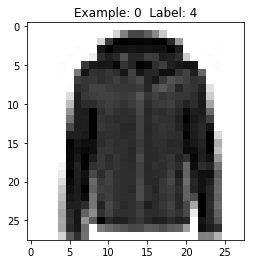

In [26]:
display_digit(0)

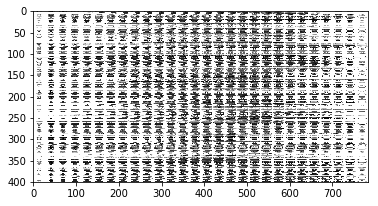

In [27]:
display_mult_flat(0,400)

In [28]:
x = tf.placeholder(tf.float32, shape=[None, 784], name='x')
y_ = tf.placeholder(tf.float32, shape=[None, 10])
W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))
y = tf.nn.softmax(tf.matmul(x,W) + b, name='y')
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))

In [29]:
x_train, y_train = TRAIN_SIZE(5500)
x_test, y_test = TEST_SIZE(10000)
LEARNING_RATE = 0.05
TRAIN_STEPS = 4000

sess = tf.Session()
init = tf.initialize_all_variables()
sess.run(init)

Total Training Images in Dataset = (55000, 784)
--------------------------------------------------
x_train Examples Loaded = (5500, 784)
y_train Examples Loaded = (5500, 10)

Total Test Examples in Dataset = (10000, 784)
--------------------------------------------------
x_test Examples Loaded = (10000, 784)
y_test Examples Loaded = (10000, 10)


In [30]:
training = tf.train.GradientDescentOptimizer(LEARNING_RATE).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [31]:
for i in range(TRAIN_STEPS+1):
    sess.run(training, feed_dict={x: x_train, y_: y_train})
    if i%100 == 0:
        print('Training Step:' + str(i) + '  Accuracy =  ' + str(sess.run(accuracy, feed_dict={x: x_test, y_: y_test})) + '  Loss = ' + str(sess.run(cross_entropy, {x: x_train, y_: y_train})))
    

Training Step:0  Accuracy =  0.3448  Loss = 2.1789012
Training Step:100  Accuracy =  0.7291  Loss = 0.83265084
Training Step:200  Accuracy =  0.7598  Loss = 0.70776296
Training Step:300  Accuracy =  0.7785  Loss = 0.646851
Training Step:400  Accuracy =  0.7881  Loss = 0.60788816
Training Step:500  Accuracy =  0.7934  Loss = 0.5798233
Training Step:600  Accuracy =  0.7987  Loss = 0.55819577
Training Step:700  Accuracy =  0.8025  Loss = 0.5407776
Training Step:800  Accuracy =  0.8057  Loss = 0.5263013
Training Step:900  Accuracy =  0.8076  Loss = 0.5139796
Training Step:1000  Accuracy =  0.8093  Loss = 0.50329214
Training Step:1100  Accuracy =  0.8114  Loss = 0.49388045
Training Step:1200  Accuracy =  0.8137  Loss = 0.48548713
Training Step:1300  Accuracy =  0.8145  Loss = 0.47792333
Training Step:1400  Accuracy =  0.8159  Loss = 0.4710455
Training Step:1500  Accuracy =  0.8168  Loss = 0.46474382
Training Step:1600  Accuracy =  0.8179  Loss = 0.45893195
Training Step:1700  Accuracy =  0.

In [32]:
saver = tf.train.Saver()
saver.save(sess, 'model/model.ckpt')

'model/model.ckpt'

In [33]:
# saver = tf.train.import_meta_graph('model/model.ckpt.meta')
# saver.restore(sess, tf.train.latest_checkpoint('model'))

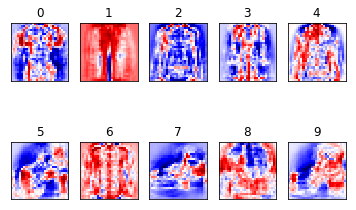

In [34]:
for i in range(10):
    plt.subplot(2, 5, i+1)
    weight = sess.run(W)[:,i]
    plt.title(i)
    plt.imshow(weight.reshape([28,28]), cmap=plt.get_cmap('seismic'))
    frame1 = plt.gca()
    frame1.axes.get_xaxis().set_visible(False)
    frame1.axes.get_yaxis().set_visible(False) 
plt.show()

Total Training Images in Dataset = (55000, 784)
--------------------------------------------------
x_train Examples Loaded = (1, 784)
y_train Examples Loaded = (1, 10)

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


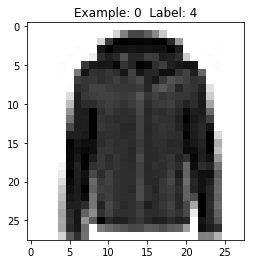

In [35]:
x_train, y_train = TRAIN_SIZE(1) 
display_digit(0)

In [36]:
answer = sess.run(y, feed_dict={x: x_train})
print(answer)

[[1.88241956e-05 7.09076849e-05 9.12275463e-02 1.96476336e-04
  8.69432390e-01 7.87396675e-06 3.80871333e-02 1.15404205e-07
  9.58426739e-04 2.61761159e-07]]


In [37]:
answer.argmax()

4

In [38]:
def display_compare(num):
    # THIS WILL LOAD ONE TRAINING EXAMPLE
    x_train = mnist.test.images[num,:].reshape(1,784)
    y_train = mnist.test.labels[num,:]
    
    # THIS GETS OUR LABEL AS A INTEGER
    label = classes[y_train.argmax()]
    
    # THIS GETS OUR PREDICATION AS A INTEGER
    prediction = sess.run(y, feed_dict={x: x_train})
    print(prediction)
    prediction = prediction.argmax()
    prediction = classes[prediction]
    
    plt.title('Prediction: %s Label: %s' % (prediction, label))
    plt.imshow(x_train.reshape([28,28]), cmap=plt.get_cmap('gray_r'))
    plt.show()
    

[[1.21271135e-02 2.24759569e-03 1.24076813e-01 1.03203561e-02
  5.02893180e-02 1.18812904e-05 7.98435211e-01 1.77707227e-06
  2.48449715e-03 5.39840039e-06]]


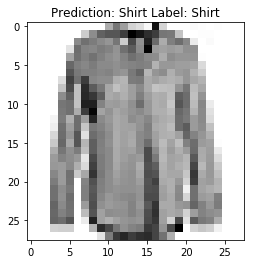

In [39]:
display_compare(ran.randint(0, 10000))


working on  images/test/10752570.jpg


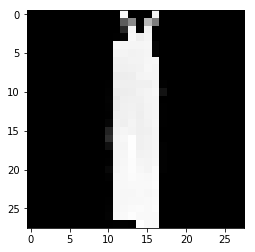

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


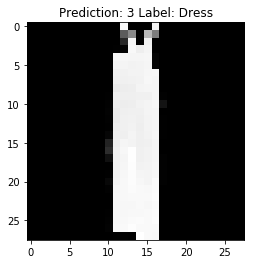

working on  images/test/61X9KGJ4I+L._UX385_.jpg


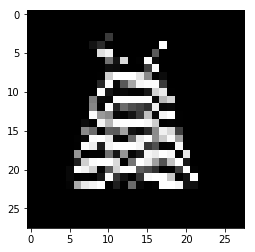

[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


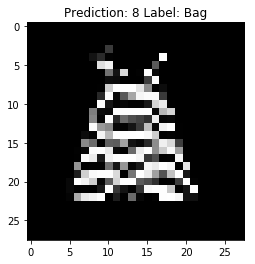

working on  images/test/girl_boot_1.jpg


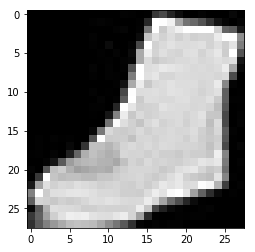

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


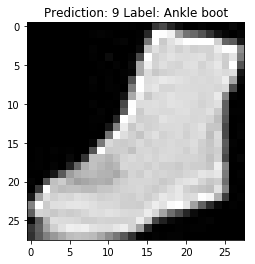

working on  images/test/girl_tshirt_1.jpg


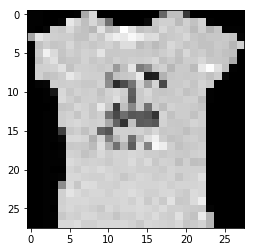

[[5.5348716e-04 0.0000000e+00 9.1895344e-25 0.0000000e+00 0.0000000e+00
  0.0000000e+00 7.4858924e-35 0.0000000e+00 9.9944645e-01 0.0000000e+00]]


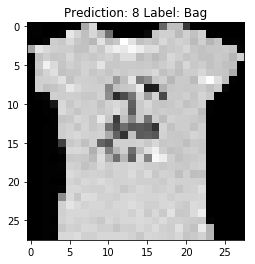

working on  images/test/men_shirt_1.jpg


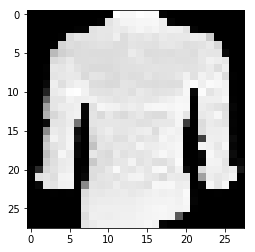

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


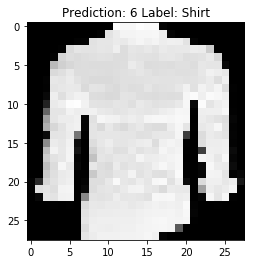

working on  images/test/Shybobbi-New-Girls-Dress-Red-Dot-Collar-Party-Birthday-Lovely-Baby-Child-Clothes-100-Cotton.jpg


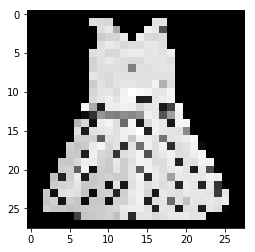

[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


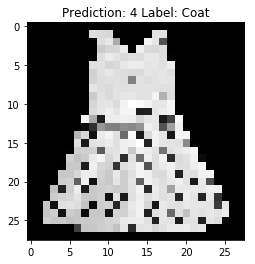

working on  images/test/ss-men-s-jeans-1.jpg


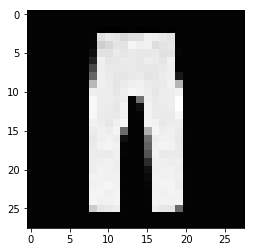

[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


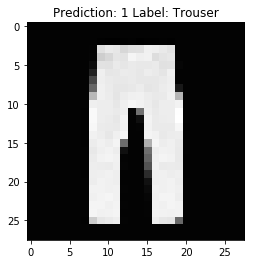

working on  images/test/ss-men-s-sportwear-1.jpg


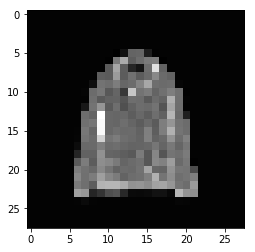

[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


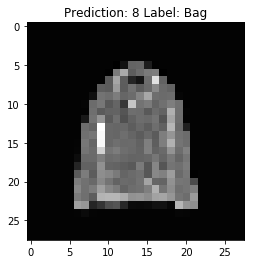

In [40]:
import os
import glob
import cv2

img_size = 28

path = os.path.join('images', 'test', '*g')
files = glob.glob(path)
for img_file in files:
    print('working on ', img_file)
    test_im = cv2.imread(img_file, cv2.IMREAD_GRAYSCALE)
    # test_im = cv2.cvtColor(test_im, cv2.COLOR_BGR2GRAY)
    # test_im = cv2.resize(test_im, (img_size, img_size))
    
    # invert grayscale
    test_im = 255 - cv2.resize(test_im, (img_size, img_size), cv2.INTER_LINEAR)
    
    plt.imshow(test_im, cmap=plt.get_cmap('Greys_r'))
    plt.show()
    # test_im = test_im.reshape(1, img_size, img_size, num_channels)
    test_im = test_im.flatten().reshape(1, 784)
    # print(test_im.shape)
    # cv2.imshow('image', test_im)
    # cv2.waitKey(0)
    # cv2.destroyAllWindows()
    # print(test_im.shape)

    # THIS GETS OUR LABEL AS A INTEGER
    # label = classes[y_train.argmax()]
    # label = 'dummy'
    
    # THIS GETS OUR PREDICATION AS A INTEGER
    prediction = sess.run(y, feed_dict={x: test_im})
    print(prediction)
    prediction = prediction.argmax()
    
    plt.title('Prediction: %d Label: %s' % (prediction, classes[prediction]))
    plt.imshow(test_im.reshape([28,28]), cmap=plt.get_cmap('Greys_r'))
    plt.show()
